In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import sys

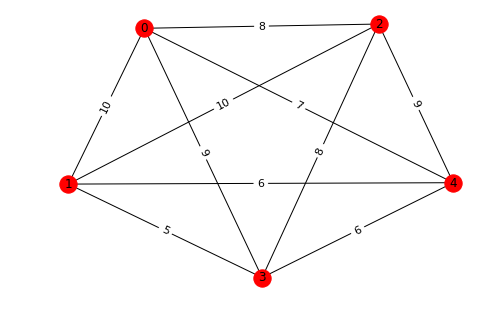

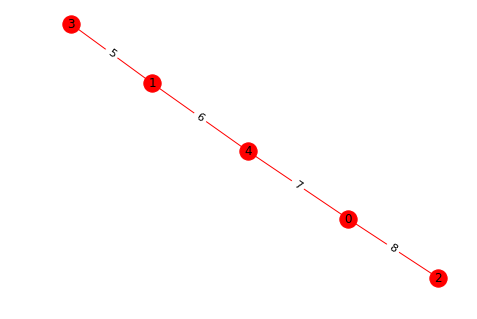

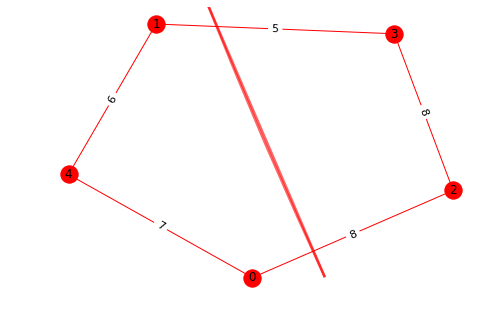

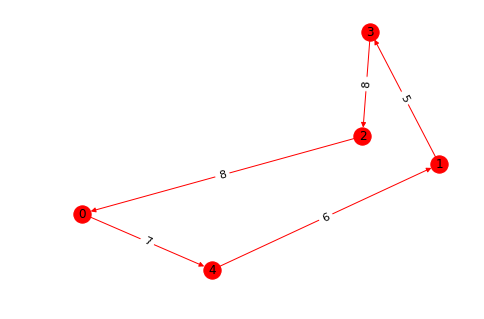

In [2]:
# A utility function that return the smallest unprocessed edge
def getMin(G, mstFlag):
    min = sys.maxsize  # assigning largest numeric value to min
    for i in [(u, v, edata['length']) for u, v, edata in G.edges( data = True) if 'length' in edata ]:
        if mstFlag[i] == False and i[2] < min:
            min = i[2]
            min_edge = i
    return min_edge

# A utility function to find root or origin of the node i in MST
def findRoot(parent, i):
    if parent[i] == i:
        return i
    return findRoot(parent, parent[i])


# A function that does union of set x and y based on the order
def union(parent, order, x, y):
    xRoot = findRoot(parent, x)
    yRoot = findRoot(parent, y)
    # Attach smaller order tree under root of high order tree
    if order[xRoot] < order[yRoot]:
        parent[xRoot] = yRoot
    elif order[xRoot] > order[yRoot]:
        parent[yRoot] = xRoot
    # If orders are same, then make any one as root and increment its order by one
    else :
        parent[yRoot] = xRoot
        order[xRoot] += 1

#function that performs kruskals algorithm on the graph G	
def genMinimumSpanningTree(G):
    MST = nx.Graph()
    eLen = len(G.edges()) # eLen denotes the number of edges in G
    vLen = len(G.nodes()) # vLen denotes the number of vertices in G
    mst = [] # mst contains the MST edges
    mstFlag = {} # mstFlag[i] will hold true if the edge i has been processed for MST
    for i in [ (u, v, edata['length']) for u, v, edata in G.edges(data = True) if 'length' in edata ]:
        mstFlag[i] = False 

    parent = [None] * vLen # parent[i] will hold the vertex connected to i, in the MST
    order = [None] * vLen	# order[i] will hold the order of appearance of the node in the MST
    for v in range(vLen):
        parent[v] = v
        order[v] = 0
    while len(mst) < vLen - 1 :
        curr_edge = getMin(G, mstFlag) # pick the smallest egde from the set of edges
        mstFlag[curr_edge] = True # update the flag for the current edge
        y = findRoot(parent, curr_edge[1])
        x = findRoot(parent, curr_edge[0])
        # adds the edge to MST, if including it doesn't form a cycle
        if x != y:
            mst.append(curr_edge)
            union(parent, order, x, y)
        # Else discard the edge
    for X in mst:
        if (X[0], X[1]) in G.edges(): 
                MST.add_edge(X[0], X[1], length = G[X[0]][X[1]]['length']) 
    return MST


#utility function that adds minimum weight matching edges to MST
def minimumWeightedMatching(MST, G, odd_vert):
    while odd_vert:
        v = odd_vert.pop()
        length = float("inf")
        #u = 1
        closest = 0
        for u in odd_vert:
            if G[v][u]['length'] < length :
                length = G[v][u]['length']
                closest = u
        MST.add_edge(v, closest, length = length)
        odd_vert.remove(closest)
    plt.figure(10)
    pos = DrawGraph(MST,'red')   


def christofedes(G ,pos):
    opGraph=nx.DiGraph()
    #optimal_dist = 0
    MST = genMinimumSpanningTree(G) # generates minimum spanning tree of graph G, using Kurskal's algo
    plt.figure(0)
    pos = DrawGraph(MST,'red')
    odd_vert = [] #list containing vertices with odd degree
    for i in MST.nodes():
        if MST.degree(i)%2 != 0: 
            odd_vert.append(i) #if the degree of the vertex is odd, then append it to odd_vert list
    minimumWeightedMatching(MST, G, odd_vert) #adds minimum weight matching edges to MST
    # now MST has the Eulerian circuit
    start = list(MST.nodes())[0]
    #j = 0
    #for i in MST.nodes():
     #   print(i)
      #  if j == 0:
       #     start = i
        #j += 1  
    visited = [False] * len(MST.nodes())
    # finds the hamiltonian circuit
    curr = start
    visited[curr] = True
    next = list(MST.neighbors(curr))[0]
    #for nd in MST.neighbors(curr):
     #   if visited[nd] == False or nd == start:
      #      next = nd
       #     break
    while next != start:
        visited[next]=True
        opGraph.add_edge(curr,next,length = G[curr][next]['length'])
        nx.draw_networkx_edges(G, pos, arrows = True, edgelist = [(curr, next)], width = 2.5, alpha = 0.6, edge_color = 'r')
        # optimal_dist = optimal_dist + G[curr][next]['length']
        # finding the shortest Eulerian path from MST
        curr = next
        for nd in MST.neighbors(curr):
            if visited[nd] == False:
                next = nd
                break
        # skip the repeated vertices        
        if next == curr:
            for nd in G.neighbors(curr):
                if visited[nd] == False:
                    next = nd
                    break
        if next == curr:
            next = start
            opGraph.add_edge(curr,next,length = G[curr][next]['length'])
            nx.draw_networkx_edges(G, pos, edgelist = [(curr, next)], width = 2.5, alpha = 0.6, edge_color = 'r')
    # optimal_dist = optimal_dist + G[curr][next]['length']
    # print optimal_dist
    return opGraph


#takes input from the file and creates a weighted undirected graph
def CreateGraph():
    G = nx.Graph()
    #f = open('input.txt')
    #n = int(f.readline())
    #wtMatrix = []
    #for i in range(n):
     #   list1 = list(map(int, (f.readline()).split()))
      #  wtMatrix.append(list1)
    #Adds egdes along with their weights to the graph 
    #for i in range(n) :
     #   for j in range(n)[i:] :
      #      if wtMatrix[i][j] > 0 :
       #             G.add_edge(i, j, length = wtMatrix[i][j])                 
    
    G.add_edge(0, 1, length = 10)
    G.add_edge(0, 2, length = 8)  
    G.add_edge(0, 3, length = 9)  
    G.add_edge(0, 4, length = 7)  
    G.add_edge(1, 2, length = 10)  
    G.add_edge(1, 3, length = 5)  
    G.add_edge(1, 4, length = 6)  
    G.add_edge(2, 3, length = 8)  
    G.add_edge(2, 4, length = 9)  
    G.add_edge(3, 4, length = 6)
    
    return G

def DrawGraph(G,color):
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels = True, edge_color = color)  #with_labels=true is to show the node number in the output graph
    edge_labels = nx.get_edge_attributes(G,'length')
    nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_labels,  font_size = 11) #prints weight on all the edges
    return pos


#main function
if __name__ == "__main__":
    G = CreateGraph()
    plt.figure(1)
    pos = DrawGraph(G,'black')
    opGraph = christofedes(G, pos)
    plt.figure(2)
    pos1 = DrawGraph(opGraph,'r') 
    plt.show()